# Data integration: Venues
Let merge the file with publication type filled manually (located in "C:\Users\hn0139\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\uniq_venues_to-edit.csv")

In [1]:
import pandas as pd

# open the manually-filled venue file to clean
manual_venue_p = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\uniq_venues_to-edit.csv"
with open(manual_venue_p, 'r', newline = '') as f:
    venue_data = pd.read_csv(f) 
print('the number of unique venues to fill in publication type: %d'%venue_data.shape[0])
venue_data['publication_type'] = venue_data['publication_type'].str.lower()
venue_data['publication_type'] = venue_data['publication_type'].replace('google research', 'other').replace('journal / conference', 'other').replace('journal ', 'journal').replace('none', 'other').replace('book', 'other')
venue_data['publication_type'] = venue_data['publication_type'].replace('other ', 'other')
print(venue_data['publication_type'].value_counts())


the number of unique venues to fill in publication type: 5210
journal       4678
conference     450
other           79
Name: publication_type, dtype: int64


In [2]:
venue_data

,venue,publication_type,corrected_venue_name,database
0,Human Resources for Health,journal,NaN,scopus
1,BMC Public Health,journal,NaN,scopus
2,EPJ Data Science,journal,NaN,scopus
3,Scientific Reports,journal,NaN,scopus
4,Social Network Analysis and Mining,journal,NaN,scopus
...,...,...,...,...
5205,J. Syst. Control. Eng.,journal,Journal of Systems and Control Engineering,semantic_scholar
5206,Proceedings of the 2011 American Control Confe...,conference,American Control Conference,semantic_scholar
5207,Ecological Restoration,journal,NaN,semantic_scholar
5208,Environmental Management,journal,NaN,semantic_scholar


In [6]:
# open the whole cleaned file to merge with the above manually-filled venue file 
cleaned_final_p = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\merged_all_data_deduplicated.csv"
with open(cleaned_final_p, 'r', encoding = 'utf-8', newline = '') as f:
    all_data = pd.read_csv(f)
    

In [4]:
venue_type_map = {}

for i in range(len(venue_data)):
    venue_type_map[venue_data['venue'][i]]=[]
    venue_type_map[venue_data['venue'][i]].extend([venue_data['publication_type'][i], venue_data['corrected_venue_name'][i]])
print(len(venue_type_map))


5209


In [5]:
pub_types, correct_names = [], []
for i in range(len(all_data)):
    venue = all_data['venue'][i]
    if pd.isna(venue):
        pub_types.append('')
        correct_names.append('')
    elif not pd.isna(venue) and venue in venue_type_map.keys():
        pub_types.append(venue_type_map[venue][0])
        corrected_name = venue_type_map[venue][1]
        if not pd.isna(corrected_name):
            correct_names.append(corrected_name)
        else:
            correct_names.append(venue)
    else:
        print('venue not in key: {} - id: {}'.format(venue, i))
        pub_types.append('other')
        correct_names.append(venue)
            

venue not in key: Social media + society - id: 5262
venue not in key: Revista ICONO14 Revista científica de Comunicación y Tecnologías emergentes - id: 5290
venue not in key: Medijska istraživanja - id: 5305
venue not in key: Comunicación y Sociedad - id: 5380
venue not in key: ComHumanitas: revista científica de comunicación - id: 5445
venue not in key: El profesional de la información - id: 5681
venue not in key: Cultura y Educación - id: 5754
venue not in key: Comunicación - id: 5756
venue not in key: Cultura y Educación - id: 5774
venue not in key: Ibersid: revista de sistemas de información y documentación - id: 5862
venue not in key: Vigilância Sanitária em Debate: Sociedade, Ciência & Tecnologia - id: 6239
venue not in key: ETD - Educação Temática Digital - id: 6277
venue not in key: Galáxia (São Paulo) - id: 6292
venue not in key: Cultura y Educación - id: 6385
venue not in key: Computación y Sistemas - id: 6426
venue not in key: Revista Conhecimento em Ação - id: 6545
venue no

In [6]:
print(len(pub_types), len(correct_names))

13823 13823


In [7]:
all_data['publication_type'] = pub_types
all_data['venue'] = correct_names
print(all_data['publication_type'].value_counts())

journal       10431
               2157
conference      922
other           310
Name: publication_type, dtype: int64


In [8]:
out_final_p = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\merged_all_data_deduplicated_added_pubtypes.csv"
with open(out_final_p, 'w', encoding = 'utf-8', newline = '') as f:
    all_data.to_csv(f)

In [10]:
# Looking at the null publication_type data to see any available venues
all_data[all_data['publication_type']=='']['venue'].value_counts()

    2157
Name: venue, dtype: int64

##### ---> it shows that all null publication_type nulls are also venue null values (2157 instances)

## ---> Therefore, let's use webscrapping to search by available doi and titles to get the venues as many as we can. See below!!

# Using webscrapping to get venues to fill in current venue null
- Original null venue file is stored in: *"C:\Users\hn0139\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\null_venues.csv"*
- Using doi and webscrapping, we got 702 venue-null example filled. Data is stored in: *"C:\Users\hn0139\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\null_venues_filled-by-doi.csv"*


In [5]:
# !pip install pandas
import pandas as pd

In [14]:
by_doi_fpath = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\null_venues_filled-by-doi.csv"
with open(by_doi_fpath, 'r', encoding = 'utf-8') as f:
    data =  pd.read_csv(f)
print(data.shape[0])
data.head(5)


2157


,Unnamed: 0,title,authors,year,citationCount,fieldsOfStudy,abstract,doi,query,database,publication_type,venue
0,0,Bridging Contextual and Methodological Gaps on...,"McClure Haughey M,Povolo M,Starbird K",2022.0,NaN,NaN,NaN,10.1145/3491102.3517503,disinformation,scopus,conference,CHI
1,1,A Comparative Evaluation of Interventions Agai...,"Heuer H,Glassman EL",2022.0,NaN,NaN,NaN,10.1145/3491102.3517717,disinformation,scopus,conference,CHI
2,2,"Accost, Accede, or Amplify: Attitudes towards ...","Varanasi RA,Pal J,Vashistha A",2022.0,NaN,NaN,NaN,10.1145/3491102.3517588,disinformation,scopus,conference,CHI
3,3,The Polyvocality of Online COVID-19 Vaccine Na...,"Diamond LL,Batan H,Anderson J,Palen L",2022.0,NaN,NaN,NaN,10.1145/3491102.3501892,disinformation,scopus,conference,CHI
4,4,Designing Credibility Tools To Combat Mis/Disi...,"Gamage D,Stomber J,Jahanbakhsh F,Skeet B,Shahi GK",2022.0,NaN,NaN,NaN,10.1145/3491101.3503700,disinformation,scopus,conference,CHI Extended Abstracts


In [15]:
n_venues_fill_bydoi = data[data['venue'].str.len()>1]
print('number of venue data filled by using doi: %d'%n_venues_fill_bydoi.shape[0])
print('number of null venue data left: %d'%(data.shape[0] - n_venues_fill_bydoi.shape[0]))

number of venue data filled by using doi: 702
number of null venue data left: 1455


In [16]:
by_title_fpath = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\null_venues_filled-by-titles.csv"
with open(by_title_fpath, 'r', encoding = 'utf-8') as f:
    df =  pd.read_csv(f)
n_venues_fill_bytitle = df[df['venue'].str.len()>1]
print('number of venue data filled by using title: %d'%n_venues_fill_bytitle.shape[0])
print('number of null venue data left: %d'%(df.shape[0] - n_venues_fill_bytitle.shape[0]))

n_venues_fill_bytitle.head()

number of venue data filled by using title: 856
number of null venue data left: 1301


,Unnamed: 0,Unnamed: 0.1,title,authors,year,citationCount,fieldsOfStudy,abstract,doi,query,database,publication_type,venue
0,0,0,Bridging Contextual and Methodological Gaps on...,"McClure Haughey M,Povolo M,Starbird K",2022.0,NaN,NaN,NaN,10.1145/3491102.3517503,disinformation,scopus,conference,CHI
1,1,1,A Comparative Evaluation of Interventions Agai...,"Heuer H,Glassman EL",2022.0,NaN,NaN,NaN,10.1145/3491102.3517717,disinformation,scopus,conference,CHI
2,2,2,"Accost, Accede, or Amplify: Attitudes towards ...","Varanasi RA,Pal J,Vashistha A",2022.0,NaN,NaN,NaN,10.1145/3491102.3517588,disinformation,scopus,conference,CHI
3,3,3,The Polyvocality of Online COVID-19 Vaccine Na...,"Diamond LL,Batan H,Anderson J,Palen L",2022.0,NaN,NaN,NaN,10.1145/3491102.3501892,disinformation,scopus,conference,CHI
4,4,4,Designing Credibility Tools To Combat Mis/Disi...,"Gamage D,Stomber J,Jahanbakhsh F,Skeet B,Shahi GK",2022.0,NaN,NaN,NaN,10.1145/3491101.3503700,disinformation,scopus,conference,CHI Extended Abstracts


In [22]:
# fill nan publication_type as empty str
df['publication_type'] = df['publication_type'].fillna('')
df['publication_type'].value_counts()

              1129
conference     886
book           142
Name: publication_type, dtype: int64

In [26]:
# As we are not going to use the book publication type, so we can just drop them for reducing the manual work.
df_drop_book = df[df['publication_type']!='book']
print('number of data after dropping book publication type: ', df_drop_book.shape[0])
print('number of venues finally need to manually fillin: ', df_drop_book[df_drop_book['venue'].str.len()>1].shape[0])

number of data after dropping book publication type:  2015
number of venues finally need to manually fillin:  812


### ---> Let's manually fill in the venues, and publication_types which are left by webscrapping.

In [27]:
#Let's sort data by publication_types, venues and databases, and write back to the file
df_drop_book = df_drop_book.sort_values(by=['venue', 'publication_type', 'database'])
with open(by_title_fpath, 'w', encoding = 'utf-8', newline = '') as f:
    df_drop_book.to_csv(f)

# Let merged the null venue file filled manually with the final cleaned data

In [36]:
import pandas as pd

In [37]:
by_hand_fpath = r"C:\Users\hn0139\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\null_venues_filled-by-titles_to-edit.csv"
with open(by_hand_fpath, 'r', encoding = 'latin1') as f:
    df =  pd.read_csv(f)
print('before normalizing:\n', df['publication_type'].str.lower().value_counts())
df['publication_type'] = df['publication_type'].str.lower().replace('others', 'other').replace('jounal', 'journal').replace('journal ', 'journal')
print('--------------\nafter normalizing:\n', df['publication_type'].value_counts())
print(df.shape)
df.head(4)

before normalizing:
 conference    915
journal       248
other         185
others         89
jounal         71
                3
journal         2
Name: publication_type, dtype: int64
--------------
after normalizing:
 conference    915
journal       321
other         274
                3
Name: publication_type, dtype: int64
(2015, 11)


,title,authors,year,citationCount,fieldsOfStudy,abstract,doi,query,database,publication_type,venue
0,Incivility detection in online comments,"Sadeque F,Rains S,Shmargad Y,Kenski K,Coe K,Be...",2019.0,NaN,NaN,NaN,NaN,troll,scopus,conference,*SEMEVAL
1,Time series classification for rumor detection,"Weiss F,Mendoza M,Milios E",2021.0,NaN,NaN,NaN,10.1049/icp.2021.1466,rumor,scopus,conference,11th International Conference of Pattern Recog...
2,SPAM Classification Based on Supervised Learni...,"[{'authorId': '2205613', 'name': 'T. Hamsapriy...",2011.0,21.0,['Computer Science'],E-mail is one of the most popular and frequent...,NaN,spam,semantic_scholar,NaN,2011 International Conference on Process Autom...
3,Rumor processes on N,"[{'authorId': '102507061', 'name': 'V. V. Juni...",2010.0,15.0,['Mathematics'],We study four discrete time stochastic systems...,NaN,rumor,semantic_scholar,NaN,2013 IEEE 33rd International Conference on Dis...


In [38]:
# open the whole cleaned file to integrate with the above manually-filled venue file 
cleaned_final_p = r"C:\Users\hn0139\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\merged_all_data_deduplicated.csv"
with open(cleaned_final_p, 'r', encoding = 'utf-8', newline = '') as f:
    all_data = pd.read_csv(f)
print('Data shape with venue null values', all_data.shape)  

print(all_data.columns)
all_data = all_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

print('the number of examples have venue null: ', all_data[all_data['venue'].isna()].shape[0])
all_data = all_data[~all_data['venue'].isna()]
print('Data shape with NO venue null values', all_data.shape)  
print(all_data['publication_type'].value_counts())


all_data.head(3) 

Data shape with venue null values (13823, 13)
Index(['Unnamed: 0.1', 'Unnamed: 0', 'title', 'authors', 'venue', 'year',
       'citationCount', 'fieldsOfStudy', 'abstract', 'doi', 'query',
       'database', 'publication_type'],
      dtype='object')
the number of examples have venue null:  2157
Data shape with NO venue null values (11666, 11)
journal    9181
other         1
Name: publication_type, dtype: int64


,title,authors,venue,year,citationCount,fieldsOfStudy,abstract,doi,query,database,publication_type
0,WHO competency framework for health authoritie...,"Rubinelli S,Purnat TD,Wihelm E,Traicoff D,Nama...",Human Resources for Health,2022.0,NaN,NaN,NaN,10.1186/s12960-022-00733-0,disinformation,scopus,journal
1,A cross-sectional study of factors associated ...,"Yeager S,Abramovitz D,Harvey-Vera AY,Vera CF,A...",BMC Public Health,2022.0,NaN,NaN,NaN,10.1186/s12889-022-13273-y,disinformation,scopus,journal
2,Mapping state-sponsored information operations...,"Uyheng J,Cruickshank IJ,Carley KM",EPJ Data Science,2022.0,NaN,NaN,NaN,10.1140/epjds/s13688-022-00338-6,disinformation,scopus,journal


In [39]:
# Let's integrate
integrated_data = pd.concat([all_data, df])
print(integrated_data.shape)

print(integrated_data['publication_type'].value_counts())
print('\n------------------------')
print(integrated_data['database'].value_counts())
print('\n------------------------')
print(integrated_data['venue'].value_counts())

integrated_data.head(3)

(13681, 11)
journal       9502
conference     915
other          275
                 3
Name: publication_type, dtype: int64

------------------------
scopus              5080
semantic_scholar    3613
wos                 3504
science_direct      1484
Name: database, dtype: int64

------------------------
ArXiv                                                                               130
WWW                                                                                 101
Lecture Notes in Networks and Systems                                                86
Vaccine                                                                              81
Physica A: Statistical Mechanics and its Applications                                74
                                                                                   ... 
ACM Trans. Internet Techn.                                                            1
International and Multidisciplinary Journal of Social Sciences                

,title,authors,venue,year,citationCount,fieldsOfStudy,abstract,doi,query,database,publication_type
0,WHO competency framework for health authoritie...,"Rubinelli S,Purnat TD,Wihelm E,Traicoff D,Nama...",Human Resources for Health,2022.0,NaN,NaN,NaN,10.1186/s12960-022-00733-0,disinformation,scopus,journal
1,A cross-sectional study of factors associated ...,"Yeager S,Abramovitz D,Harvey-Vera AY,Vera CF,A...",BMC Public Health,2022.0,NaN,NaN,NaN,10.1186/s12889-022-13273-y,disinformation,scopus,journal
2,Mapping state-sponsored information operations...,"Uyheng J,Cruickshank IJ,Carley KM",EPJ Data Science,2022.0,NaN,NaN,NaN,10.1140/epjds/s13688-022-00338-6,disinformation,scopus,journal


## Select Journal data only

In [40]:
# If we select journal only:
journal_data = integrated_data[integrated_data['publication_type']=='journal']
print('Data of journal only has shape: ', journal_data.shape )
print(journal_data['publication_type'].value_counts())
print('\n------------------------')
print(journal_data['database'].value_counts())
print('\n------------------------')
print(journal_data['year'].value_counts())
print('\n------------------------')
print(journal_data['query'].value_counts())

out_journal = r"C:\Users\hn0139\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\journal_data.csv"


Data of journal only has shape:  (9502, 11)
journal    9502
Name: publication_type, dtype: int64

------------------------
scopus              4194
wos                 3503
science_direct      1484
semantic_scholar     321
Name: database, dtype: int64

------------------------
2021.0    2767
2022.0    2623
2020.0    1017
2019.0     610
2018.0     487
2017.0     373
2016.0     317
2015.0     269
2014.0     227
2013.0     213
2012.0     155
2010.0     145
2011.0     135
Name: year, dtype: int64

------------------------
misinformation    2122
rumor             1838
disinformation    1632
fake+news         1265
troll             1218
Spam               745
spam               682
Name: query, dtype: int64


In [41]:
# Checking null values
print('\n----------------fieldsOfStudy---------------')
print(journal_data['fieldsOfStudy'].isnull().value_counts())
for column in journal_data.columns:
    print('\n----------------%s---------------' %column)
    print(journal_data[column].notnull().value_counts())



----------------fieldsOfStudy---------------
True     5701
False    3801
Name: fieldsOfStudy, dtype: int64

----------------title---------------
True    9502
Name: title, dtype: int64

----------------authors---------------
True     9435
False      67
Name: authors, dtype: int64

----------------venue---------------
True    9502
Name: venue, dtype: int64

----------------year---------------
True     9338
False     164
Name: year, dtype: int64

----------------citationCount---------------
False    9181
True      321
Name: citationCount, dtype: int64

----------------fieldsOfStudy---------------
False    5701
True     3801
Name: fieldsOfStudy, dtype: int64

----------------abstract---------------
True     4860
False    4642
Name: abstract, dtype: int64

----------------doi---------------
True     8351
False    1151
Name: doi, dtype: int64

----------------query---------------
True    9502
Name: query, dtype: int64

----------------database---------------
True    9502
Name: database, dty

In [43]:
# If we take only doi
journal_data = journal_data[journal_data['doi'].notnull()]

with open(out_journal, 'w', encoding = 'utf-8', newline = '') as f:
    journal_data.to_csv(f)
journal_data

,title,authors,venue,year,citationCount,fieldsOfStudy,abstract,doi,query,database,publication_type
0,WHO competency framework for health authoritie...,"Rubinelli S,Purnat TD,Wihelm E,Traicoff D,Nama...",Human Resources for Health,2022.0,NaN,NaN,NaN,10.1186/s12960-022-00733-0,disinformation,scopus,journal
1,A cross-sectional study of factors associated ...,"Yeager S,Abramovitz D,Harvey-Vera AY,Vera CF,A...",BMC Public Health,2022.0,NaN,NaN,NaN,10.1186/s12889-022-13273-y,disinformation,scopus,journal
2,Mapping state-sponsored information operations...,"Uyheng J,Cruickshank IJ,Carley KM",EPJ Data Science,2022.0,NaN,NaN,NaN,10.1140/epjds/s13688-022-00338-6,disinformation,scopus,journal
3,A digital media literacy intervention for olde...,"Moore RC,Hancock JT",Scientific Reports,2022.0,NaN,NaN,NaN,10.1038/s41598-022-08437-0,disinformation,scopus,journal
4,Lateral reading and monetary incentives to spo...,"Panizza F,Ronzani P,Martini C,Mattavelli S,Mor...",Scientific Reports,2022.0,NaN,NaN,NaN,10.1038/s41598-022-09168-y,disinformation,scopus,journal
...,...,...,...,...,...,...,...,...,...,...,...
13818,Denigration Bullying Resolution using Wolf Sea...,"Sangwan SR,Bhatia MPS",Procedia Computer Science,2020.0,NaN,NaN,Denigration is the most common bullying tactic...,10.1016/j.procs.2020.06.036,rumor,science_direct,journal
13819,Epidemic model on rumor propagation in e-commerce,"Kishore R,Tyagi I,Rao YS,Kumar D",Materials Today: Proceedings,2022.0,NaN,NaN,In the present scenario for business and commu...,10.1016/j.matpr.2021.11.263,rumor,science_direct,journal
13820,Increased incidence of cutaneous Staphylococcu...,"Suarez-Diaz E,Hubiche T,Del Giudice P",Annales de Dermatologie et de Vénéréologie,2022.0,NaN,NaN,Background Natural disasters are typically ass...,10.1016/j.annder.2021.12.004,rumor,science_direct,journal
13821,A cross-sectional study of Persian medicine an...,"Vardanjani HM,Heydari ST,Dowran B,Pasalar M",Integrative Medicine Research,2020.0,NaN,NaN,Background Traditional medicine structures suc...,10.1016/j.imr.2020.100482,rumor,science_direct,journal


### Fill in abstract with doi (scrapping data from semantic scholar)
We have scrapped this abstract field using doi from semantic scholar, we filled 6230-4642 = 1588. So it's possible that we have to drop the records which do not have abstract as Abstract is important for judging paper relavence and content analysis. See below the data expoloratory and how we drop the leftover abstract null data.

In [3]:
import pandas as pd
journal_data_filledby_abstract_p = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\journal_data+abstract_filled.csv"
with open(journal_data_filledby_abstract_p, 'r', encoding = 'utf-8', newline = '') as f:
    journal_data_filledby_abstract = pd.read_csv(f)

print('Data with abstract shape: ', journal_data_filledby_abstract.shape)
print('Data of journal only has shape: ', journal_data_filledby_abstract.shape )
print(journal_data_filledby_abstract['publication_type'].value_counts())
print('\n------------------------')
print(journal_data_filledby_abstract['database'].value_counts())
print('\n------------------------')
print(journal_data_filledby_abstract['year'].value_counts())
print('\n------------------------')
print(journal_data_filledby_abstract['query'].value_counts())

# Checking null values
print('\n----------------fieldsOfStudy---------------')
print(journal_data_filledby_abstract['fieldsOfStudy'].isnull().value_counts())
for column in journal_data_filledby_abstract.columns:
    print('\n----------------%s---------------' %column)
    print(journal_data_filledby_abstract[column].notnull().value_counts())


Data with abstract shape:  (8351, 13)
Data of journal only has shape:  (8351, 13)
journal    8351
Name: publication_type, dtype: int64

------------------------
scopus            3944
wos               2923
science_direct    1484
Name: database, dtype: int64

------------------------
2021.0    2576
2022.0    2532
2020.0     814
2019.0     521
2018.0     359
2017.0     291
2016.0     245
2015.0     210
2014.0     163
2013.0     157
2012.0     117
2010.0     104
2011.0      98
Name: year, dtype: int64

------------------------
misinformation    2003
rumor             1733
disinformation    1348
fake+news         1048
troll              928
spam               652
Spam               639
Name: query, dtype: int64

----------------fieldsOfStudy---------------
True     5428
False    2923
Name: fieldsOfStudy, dtype: int64

----------------Unnamed: 0.1---------------
True    8351
Name: Unnamed: 0.1, dtype: int64

----------------Unnamed: 0---------------
True    8351
Name: Unnamed: 0, dtype: in

In [8]:
journal_filledby_abstract_dropnull = journal_data_filledby_abstract[journal_data_filledby_abstract['abstract'].notnull()]

print('Data with abstract shape: ', journal_filledby_abstract_dropnull.shape)
print(journal_filledby_abstract_dropnull['publication_type'].value_counts())
print('\n------------------------')
print(journal_filledby_abstract_dropnull['database'].value_counts())
print('\n------------------------')
print(journal_filledby_abstract_dropnull['year'].value_counts())
print('\n------------------------')
print(journal_filledby_abstract_dropnull['query'].value_counts())

# Checking null values
print('\n----------------fieldsOfStudy---------------')
print(journal_filledby_abstract_dropnull['fieldsOfStudy'].isnull().value_counts())
for column in journal_filledby_abstract_dropnull.columns:
    print('\n----------------%s---------------' %column)
    print(journal_filledby_abstract_dropnull[column].notnull().value_counts())


# write the file out
out_journal_abstract = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\journal+doi+abstract_data.csv"

with open(out_journal_abstract, 'w', encoding = 'utf-8', newline = '') as f:
    journal_filledby_abstract_dropnull.to_csv(f)
journal_filledby_abstract_dropnull.head(3)

Data with abstract shape:  (6230, 13)
journal    6230
Name: publication_type, dtype: int64

------------------------
wos               2828
scopus            1998
science_direct    1404
Name: database, dtype: int64

------------------------
2021.0    1813
2022.0    1426
2020.0     756
2019.0     476
2018.0     336
2017.0     249
2016.0     214
2015.0     197
2014.0     153
2013.0     142
2012.0     114
2010.0     101
2011.0      93
Name: year, dtype: int64

------------------------
misinformation    1611
rumor             1395
disinformation     936
troll              718
fake+news          694
Spam               623
spam               253
Name: query, dtype: int64

----------------fieldsOfStudy---------------
True     3402
False    2828
Name: fieldsOfStudy, dtype: int64

----------------Unnamed: 0.1---------------
True    6230
Name: Unnamed: 0.1, dtype: int64

----------------Unnamed: 0---------------
True    6230
Name: Unnamed: 0, dtype: int64

----------------title---------------
Tr

,Unnamed: 0.1,Unnamed: 0,title,authors,venue,year,citationCount,fieldsOfStudy,abstract,doi,query,database,publication_type
0,3944,8828,Rhetoric of parliamentary disinformation on Tw...,"Campos-Dominguez, Eva; Esteve-Del-Valle, Marc;...",COMUNICAR,2022.0,NaN,Communication; Education & Educational Research,Democracy is based on individuals' ability to ...,10.3916/C72-2022-04,disinformation,wos,journal
1,3945,8829,"Identity, stability, Hybrid Threats and Disinf...","Freedman, Jane; Gjorv, Gunhild Hoogensen; Raza...",REVISTA ICONO 14-REVISTA CIENTIFICA DE COMUNIC...,2021.0,NaN,Communication,The following article examines the relevance o...,10.7195/ri14.v19i1.1618,disinformation,wos,journal
2,3946,8830,The anatomy of Russian disinformation,"Colom Piella, Guillem",HISTORIA Y COMUNICACION SOCIAL,2020.0,NaN,"Film, Radio & Television; History",Revealed with the invasion of Crimea and popul...,10.5209/hics.63373,disinformation,wos,journal


### Fill in the field of study, citation count, and year using doi (scrap data from semmantic scholar)

In [7]:
!pip install matplotlib
!pip install seaborn

     ---------------------------------------- 7.2/7.2 MB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 11.6 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 944.1/944.1 kB 9.9 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


     -------------------------------------- 292.8/292.8 kB 4.6 MB/s eta 0:00:00
     --------------------------------------- 38.6/38.6 MB 10.5 MB/s eta 0:00:00


Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'title',
       'authors', 'venue', 'year', 'citationCount', 'fieldsOfStudy',
       'abstract', 'doi', 'query', 'database', 'publication_type'],
      dtype='object')
Data shape:  (6230, 11)
journal    6230
Name: publication_type, dtype: int64

------------------------
wos               2828
scopus            1998
science_direct    1404
Name: database, dtype: int64

------------------------
2021.0    1916
2022.0    1466
2020.0     767
2019.0     477
2018.0     336
2017.0     249
2016.0     214
2015.0     197
2014.0     153
2013.0     142
2012.0     114
2010.0     101
2011.0      93
Name: year, dtype: int64

------------------------
misinformation    1611
rumor             1395
disinformation     936
troll              718
fake+news          694
Spam               623
spam               253
Name: query, dtype: int64

----------------title---------------
True    6230
Name: title, dtype: int64

----------------authors--

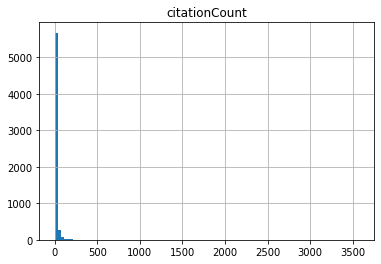

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_p = r"C:\Users\hn0139\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\journal+doi+abstract+year+citation+fieldofstudy.csv"
with open(data_p, 'r',encoding = 'utf-8') as f:
    data = pd.read_csv(f)
print(data.columns)
data = data.drop(columns=['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])

print('Data shape: ', data.shape)
print(data['publication_type'].value_counts())
print('\n------------------------')
print(data['database'].value_counts())
print('\n------------------------')
print(data['year'].value_counts())
print('\n------------------------')
print(data['query'].value_counts())

# Checking null values
for column in data.columns:
    print('\n----------------%s---------------' %column)
    print(data[column].notnull().value_counts())

print('citation count: min = %s, max = %s, mean = %s, median = %s' %(str(data.citationCount.min()),str(data.citationCount.max()), 
                                                                    str(data.citationCount.mean()), str(data.citationCount.median())))
hist = data.hist(column = 'citationCount', bins=100)



Data shape:  (5586, 11)
journal    5586
Name: publication_type, dtype: int64

------------------------
wos               2715
scopus            1589
science_direct    1282
Name: database, dtype: int64

------------------------
2021.0    1716
2022.0    1119
2020.0     741
2019.0     462
2018.0     328
2017.0     239
2016.0     207
2015.0     189
2014.0     151
2013.0     139
2012.0     107
2010.0      97
2011.0      91
Name: year, dtype: int64

------------------------
misinformation    1498
rumor             1242
disinformation     782
troll              677
Spam               598
fake+news          580
spam               209
Name: query, dtype: int64

----------------title---------------
True    5586
Name: title, dtype: int64

----------------authors---------------
True    5586
Name: authors, dtype: int64

----------------venue---------------
True    5586
Name: venue, dtype: int64

----------------year---------------
True    5586
Name: year, dtype: int64

----------------citationCount

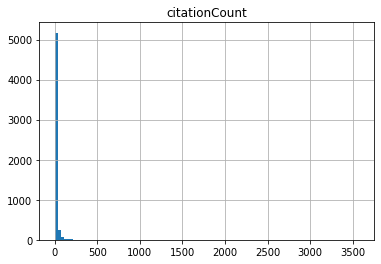

In [10]:
data = data.dropna()

print('Data shape: ', data.shape)
print(data['publication_type'].value_counts())
print('\n------------------------')
print(data['database'].value_counts())
print('\n------------------------')
print(data['year'].value_counts())
print('\n------------------------')
print(data['query'].value_counts())

# Checking null values
for column in data.columns:
    print('\n----------------%s---------------' %column)
    print(data[column].notnull().value_counts())

print('citation count: min = %s, max = %s, mean = %s, median = %s' %(str(data.citationCount.min()),str(data.citationCount.max()), 
                                                                    str(data.citationCount.mean()), str(data.citationCount.median())))
hist = data.hist(column = 'citationCount', bins=100)

# write the file out
out_final_p = r"C:\Users\hn0139\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\journal+doi+abstract+year+citation+fieldofstudy_dropnull.csv"

with open(out_final_p, 'w', encoding = 'utf-8', newline = '') as f:
    data.to_csv(f)
    
# with open(out_final_p, 'r', encoding = 'utf-8', newline = '') as f:
#     new_data = pd.read_csv(f)
# new_data

#### Observing the field of study

In [3]:
import pandas as pd
out_final_p = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\journal+doi+abstract+year+citation+fieldofstudy_dropnull.csv"

with open(out_final_p, 'r', encoding = 'utf-8', newline = '') as f:    
    data = pd.read_csv(f)

print('Number of null data: \n ', data.isnull().sum())

Number of null data: 
  Unnamed: 0          0
title               0
authors             0
venue               0
year                0
citationCount       0
fieldsOfStudy       0
abstract            0
doi                 0
query               0
database            0
publication_type    0
dtype: int64


In [4]:

count_multi = 0
all_fieldofstudy = []
for fields in data.fieldsOfStudy:
    fields = fields.replace(',', ';').replace("'", "").replace('[', '').replace(']', '')
    if len(fields.split(';'))>1:
        count_multi+=1
        all_fieldofstudy.extend(fields.split(';'))
    else:
        all_fieldofstudy.append(fields)
print(count_multi)

1278


In [5]:
all_fieldofstudy = [field.strip() for field in all_fieldofstudy]
count_fields = {}
for item in all_fieldofstudy:
    count_fields[item] = count_fields.get(item, 0)+1
len(count_fields)
sorted_count_fields = {k:v for k, v in sorted(count_fields.items(), key=lambda item: item[1], reverse=True) }
print('the number of fields of study: ', len(sorted_count_fields))
slice_count_fields = {k:v for k, v in sorted_count_fields.items() if v>3}
print(len(slice_count_fields))
slice_count_fields

the number of fields of study:  144
99


{'Medicine': 1508,
 'Computer Science': 1321,
 'Psychology': 546,
 'Communication': 419,
 'Engineering': 250,
 'Political Science': 226,
 'Sociology': 186,
 'Information Science & Library Science': 182,
 'Physics': 170,
 'Mathematics': 138,
 'Government & Law': 135,
 'Telecommunications': 122,
 'Business': 109,
 'Social Sciences - Other Topics': 104,
 'Business & Economics': 99,
 'Science & Technology - Other Topics': 99,
 'History': 93,
 'Environmental Sciences & Ecology': 83,
 'Public': 71,
 'Environmental & Occupational Health': 71,
 'Chemistry': 51,
 'International Relations': 50,
 'Operations Research & Management Science': 50,
 'Linguistics': 46,
 'Materials Science': 45,
 'Geography': 45,
 'Geology': 45,
 'Arts & Humanities - Other Topics': 44,
 'Economics': 41,
 'Education & Educational Research': 36,
 'Health Care Sciences & Services': 31,
 'General & Internal Medicine': 30,
 'Biology': 30,
 'Film': 25,
 'Radio & Television': 25,
 'Neurosciences & Neurology': 25,
 'Environment

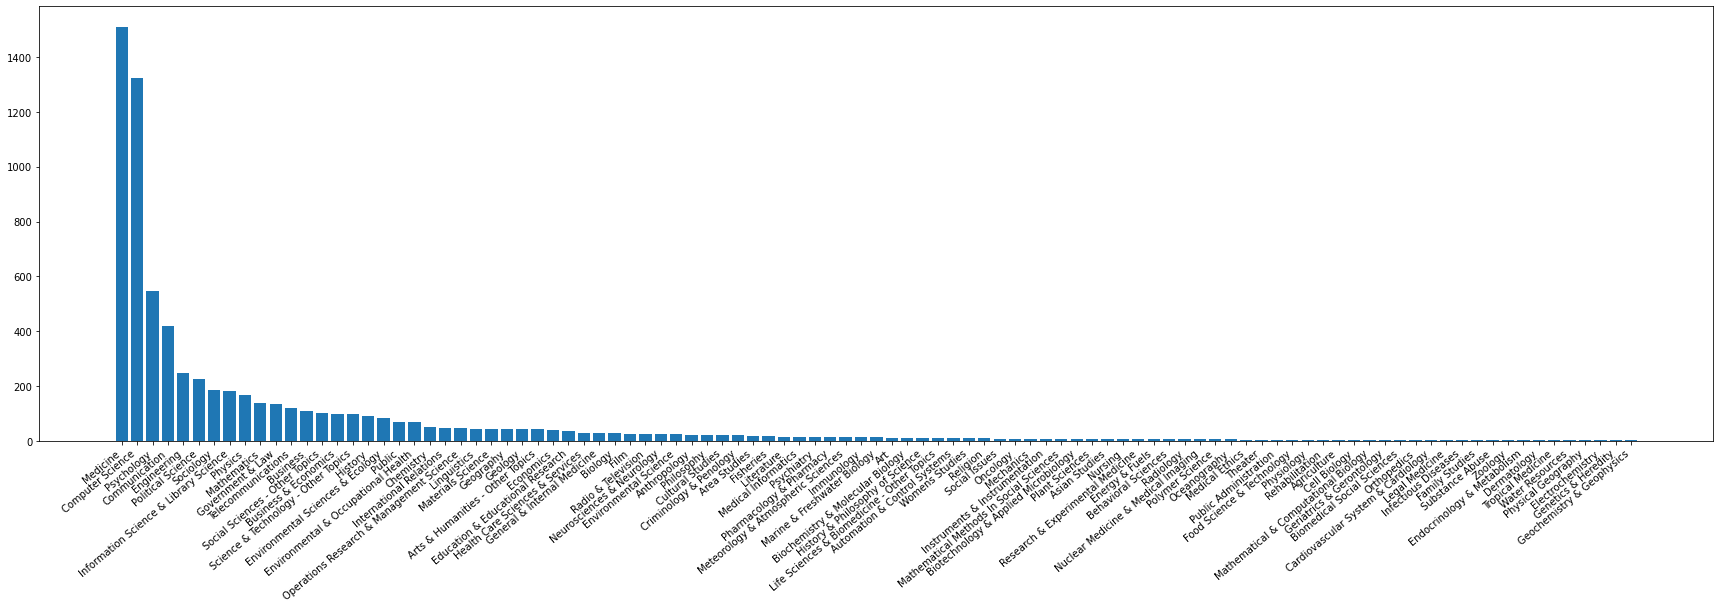

In [45]:
# print(all_fieldofstudy.value_counts())
plt.figure(figsize=(30,8))
plt.bar(range(len(slice_count_fields)), list(slice_count_fields.values()), tick_label= list(slice_count_fields.keys()))
plt.xticks(rotation = 40, ha = 'right')
# plt.tick_params(axis='both', which='minor', labelsize=4)
plt.show()

### Filtering with LIS journals
We want to retain only LIS papers before moving to relevance/irrelevance labeling
We use an external database


In [20]:
import pandas as pd
lis_journals_p = r"..\data\Journals Relevancy-annotation-08102022.csv"
with open (lis_journals_p, 'r') as f:
    lis_annot = pd.read_csv(f)
print(lis_annot['Relevancy'].value_counts())

lis_journals = lis_annot[lis_annot['Relevancy']=='Relevant']['venue'].tolist()
# lis_journals = lis_annot[lis_annot['Relevancy'].isin(['Relevant', 'Partial Relevant'])]['venue'].tolist()

print(lis_journals)

Irrelevant          2333
Relevant              54
Partial Relevant      15
Name: Relevancy, dtype: int64
['profesional de la informacion', 'publications', 'international journal of information management', 'journal of the association for information science and technology', 'journal of information science', 'government information quarterly', 'online information review', 'social science computer review', 'journal of health communication', 'library hi tech', 'electronic library', 'reference services review', 'journal of documentation', 'information technology and people', 'communications in information literacy', 'information communication and society', 'journal of librarianship and information science', 'global knowledge, memory and communication', 'desidoc journal of library and information technology', 'libri', 'information and learning science', 'journal of the australian library and information association', 'personal and ubiquitous computing', 'aslib journal of information managem

In [21]:
# Open our filtered data
final_p = r"C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\journal+doi+abstract+year+citation+fieldofstudy_dropnull.csv"
# out_lis_p = r'C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\lis_data_by_journal_partial.csv'
out_lis_p = r'C:\Users\huyen\OneDrive - UNT System\A_PhD_PATH\PROJECTS\Misinformation\Misinformation_literature_review\metadata\merged_all_data\lis_data_by_journal_full.csv'

with open(final_p, 'r', encoding = 'utf-8', newline = '') as f:    
    data = pd.read_csv(f)
print(data.columns)
data['venue'] = data['venue'].str.strip().str.lower()
lis_data = data[data['venue'].isin(lis_journals)]
print('shape of lis data: ', lis_data.shape)
with open(out_lis_p, 'w', encoding = 'utf-8', newline= '') as f:
    lis_data.to_csv(f)

Index(['Unnamed: 0', 'title', 'authors', 'venue', 'year', 'citationCount',
       'fieldsOfStudy', 'abstract', 'doi', 'query', 'database',
       'publication_type'],
      dtype='object')
shape of lis data:  (171, 12)
